# Basic Probability Concepts with Python
This notebook illustrates fundamental probability concepts with concise explanations and minimal Python examples. Only Python's built‑in functionality (plus `networkx` for graphs) is used to keep the focus on the ideas.

**Covered topics**
1. Unconditional (Marginal) Probability
2. Conditional Probability
3. Joint Probability
4. Marginal Independence
5. Conditional Independence
6. Conditional Dependence
7. Bayes' Theorem
8. d‑Separation

## 1. Unconditional (Marginal) Probability
The **unconditional probability** (or *marginal probability*) of an event \(A\) is the probability that \(A\) occurs irrespective of any other events.

$$
P(A) = \frac{\text{number of favourable outcomes}}{\text{total number of outcomes}}
$$
### Example
What is the probability of rolling a 4 with a fair six‑sided die?  The theoretical answer is $$P(\text{roll}=4)=\tfrac16$$. The code below confirms this approximately via simulation.

In [ ]:
import random, math
trials = 100_000
fours = sum(1 for _ in range(trials) if random.randint(1, 6) == 4)
print('Estimated P(roll=4) =', fours / trials)

Estimated P(roll=4) = 0.16787


### Another Example: What’s the probability a student prefers Python?

Let’s compute this in two ways: first using a `for` loop, then using a concise generator expression.


In [ ]:
students = [
    ('Alice', 'Python'),
    ('Bob', 'JavaScript'),
    ('Charlie', 'Python'),
    ('David', 'Java'),
    ('Eve', 'Python'),
    ('Frank', 'Java'),
    ('Grace', 'C++'),
    ('Hannah', 'Python'),
]

# Method 1: Using a for loop
python_count = 0
for _, lang in students:
    if lang == 'Python':
        python_count += 1
total = len(students)
print("P(Python) using loop:", python_count / total)

# Method 2: Using a generator expression (short version)
python_count_short = sum(1 for _, lang in students if lang == 'Python')
print("P(Python) using short version:", python_count_short / len(students))


P(Python) using loop: 0.5
P(Python) using short version: 0.5


## 2. Conditional Probability
The **conditional probability** of \(A\) given \(B\) is the probability that \(A\) occurs when we know \(B\) has occurred.

$$
P(A\mid B) = \frac{P(A, B)}{P(B)}
$$
### Example
Draw one card from a standard deck.  Let
- \(A\): “card is an Ace” (4 out of 52)
- \(B\): “card is red” (26 out of 52)

We compute \(P(A\mid B)\).

In [ ]:
# Conditional probability example with a deck of cards
total = 52
aces = 4
red_cards = 26
red_aces = 2
p_b = red_cards / total
p_a_and_b = red_aces / total
p_a_given_b = p_a_and_b / p_b
print('P(A | B) =', p_a_given_b)

P(A | B) = 0.07692307692307693


## 3. Joint Probability
The **joint probability** \(P(A, B)\) is the probability that both events occur.
For the card example above:
$$
P(\text{red and Ace}) = \frac{2}{52}
$$
Below we print the value:

In [ ]:
print('P(red ∧ Ace) =', 2/52)


P(red ∧ Ace) = 0.038461538461538464


## 4. Marginal Independence
Two events \(A\) and \(C\) are **independent** if knowledge of one does not change the probability of the other:
$$
P(A, C) = P(A)\,P(C)
$$
### Example
Let
- \(A\): “die roll is 3”
- \(C\): “coin toss is Heads”

Because die and coin are unrelated, these events are independent.

In [ ]:
p_die_3 = 1/6
p_heads = 0.5
print('Expected P(3 and Heads) =', p_die_3 * p_heads)

Expected P(3 and Heads) = 0.08333333333333333


___
##  Example: Are `Weather` and `Day Type` Marginally Independent?

We want to check if two events are **marginally independent**:

- \( A \): The weather is **sunny**
- \( B \): The day is a **weekend**

Events \(A\) and \(B\) are **marginally independent** if:

$$
P(A \cap B) = P(A) \cdot P(B)
$$

Let’s use the dataset below to estimate these probabilities.


In [ ]:
# Dataset of (weather, day_type) pairs
data = [
    ('sunny', 'weekday'),
    ('sunny', 'weekday'),
    ('rainy', 'weekday'),
    ('sunny', 'weekend'),
    ('rainy', 'weekend'),
    ('rainy', 'weekend'),
    ('sunny', 'weekday'),
    ('rainy', 'weekday'),
]

total = len(data)

# Count sunny days
sunny_count = sum(1 for weather, _ in data if weather == 'sunny')

# Count weekend days
weekend_count = sum(1 for _, day in data if day == 'weekend')

# Count sunny AND weekend days
sunny_and_weekend = sum(1 for weather, day in data if weather == 'sunny' and day == 'weekend')

# Probabilities
P_A = sunny_count / total
P_B = weekend_count / total
P_A_and_B = sunny_and_weekend / total

# Output
print("P(sunny) =", P_A)
print("P(weekend) =", P_B)
print("P(sunny ∩ weekend) =", P_A_and_B)
print("P(sunny) * P(weekend) =", P_A * P_B)


P(sunny) = 0.5
P(weekend) = 0.375
P(sunny ∩ weekend) = 0.125
P(sunny) * P(weekend) = 0.1875


### Conclusion

We calculated:

- $P(\text{sunny}) = 0.5 $
- $P(\text{weekend}) = 0.375 $
- $P(\text{sunny} \cap \text{weekend}) = 0.125 $
- $P(\text{sunny}) \cdot P(\text{weekend}) = 0.1875 $

Since:
$$
P(\text{sunny} \cap \text{weekend}) \ne P(\text{sunny}) \cdot P(\text{weekend})
$$

We conclude that **weather and day type are not marginally independent** in this dataset.


____

## 5. Conditional Independence
Events \(A\) and \(C\) are **conditionally independent given** \(B\) if
$$
P(A, C \mid B) = P(A\mid B)\,P(C\mid B)
$$
### Example
Let
- \(B\): Weather (0 = dry, 1 = rainy)
- \(A\): Carry umbrella
- \(C\): Wear rain‑boots

Given the weather, the choices for umbrella and rain‑boots are independent.

In [ ]:
p_b_rain = 0.3
p_a_given_rain = 0.9
p_c_given_rain = 0.8
p_a_and_c_given_rain = p_a_given_rain * p_c_given_rain

p_a_given_dry = 0.1
p_c_given_dry = 0.05
p_a_and_c_given_dry = p_a_given_dry * p_c_given_dry

print('P(A,C | rain) =', p_a_and_c_given_rain)
print('P(A,C | dry)  =', p_a_and_c_given_dry)

P(A,C | rain) = 0.7200000000000001
P(A,C | dry)  = 0.005000000000000001


## 6. Conditional Dependence (Explaining‑Away)
Sometimes two causes are marginally independent but become dependent once we observe their common effect (a *collider*). This is known as **explaining‑away**.
### Example
- \(A\): Burglary
- \(C\): Earthquake
- \(B\): Alarm rings

Before hearing the alarm, Burglary and Earthquake are independent. After conditioning on the alarm, evidence for one cause lowers the probability of the other.

In [ ]:
p_burglary = 0.001
p_quake = 0.002
p_alarm_given_burglary = 0.95
p_alarm_given_quake = 0.90
p_alarm_given_none = 0.001

from itertools import product
joint = {}
def alarm_prob(burg, quake):
    if burg or quake:
        return p_alarm_given_burglary if burg else p_alarm_given_quake
    return p_alarm_given_none

for burg, quake in product([0,1],[0,1]):
    p_ab = p_burglary if burg else 1 - p_burglary
    p_q = p_quake if quake else 1 - p_quake
    joint[(burg, quake)] = p_ab * p_q * alarm_prob(burg, quake)

p_alarm = sum(joint.values())
posterior = {k: v/p_alarm for k, v in joint.items()}
print('Posterior P(Burglary, Quake | Alarm)')
for k, v in posterior.items():
    print(k, '→', round(v,4))

Posterior P(Burglary, Quake | Alarm)
(0, 0) → 0.2662
(0, 1) → 0.4801
(1, 0) → 0.2532
(1, 1) → 0.0005


## 7. Bayes' Theorem
Bayes' theorem lets us update beliefs in light of new evidence:
$$
P(A\mid B) = \frac{P(B\mid A) P(A)}{P(B)}
$$
### Example
A disease affects 1 % of people.  A test is 95 % sensitive and 90 % specific.  What is $P(\text{disease}\mid\text{positive})$?

In [ ]:
p_disease = 0.01
sens = 0.95
spec = 0.90
p_positive = sens * p_disease + (1 - spec) * (1 - p_disease)
p_post = (sens * p_disease) / p_positive
print('P(Disease | positive) =', round(p_post,3))

P(Disease | positive) = 0.088


## 8. Graph Construction and Traversal with NetworkX
Graphs are fundamental data structures used to represent relationships between variables or entities. In probabilistic models, **directed graphs** (like Bayesian networks) and **undirected graphs** (like Markov Random Fields) represent different types of independence assumptions.

In this section, we:
- Build and visualize a directed and an undirected graph.
- Traverse the graphs using **breadth-first search (BFS)**.
- Use traversal to determine whether two nodes are connected.

This helps us understand how directionality changes the meaning of “connectivity” in a graph.

In [ ]:
import networkx as nx, matplotlib.pyplot as plt


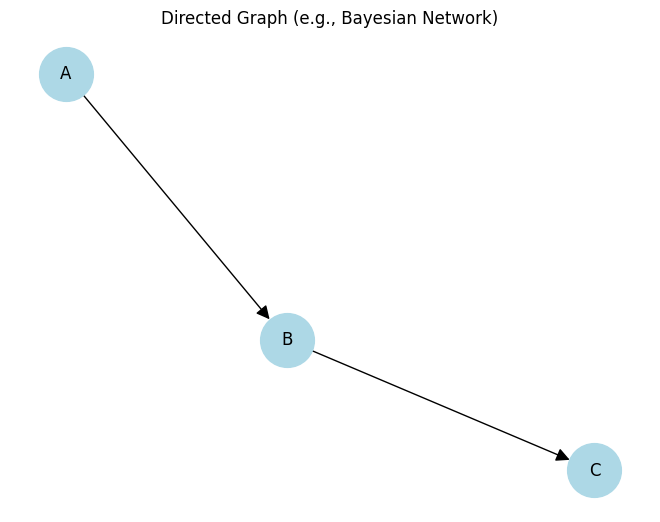

Can A reach C in directed graph? True
Can C reach A in directed graph? False


In [ ]:
# --- Directed Graph: A → B → C ---
G_dir = nx.DiGraph()
G_dir.add_edges_from([('A', 'B'), ('B', 'C')])

# Visualize
pos = nx.spring_layout(G_dir, seed=1)
nx.draw(G_dir, pos, with_labels=True, node_color='lightblue', node_size=1500, arrowsize=20)
plt.title("Directed Graph (e.g., Bayesian Network)")
plt.show()

# BFS that respects direction
def reachable_directed(graph, source, target):
    visited = set()
    queue = [source]
    while queue:
        node = queue.pop(0)
        if node == target:
            return True
        if node in visited:
            continue
        visited.add(node)
        queue.extend(graph.successors(node))  # Only follow forward edges
    return False

print("Can A reach C in directed graph?", reachable_directed(G_dir, 'A', 'C'))  # True
print("Can C reach A in directed graph?", reachable_directed(G_dir, 'C', 'A'))  # False

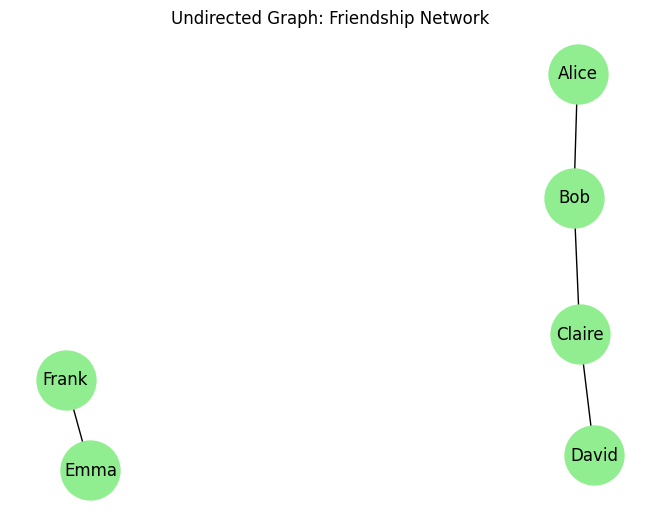

Are Alice and David connected? True
Are Alice and Emma connected? False


In [ ]:
# Build the friendship network
G_friends = nx.Graph()
G_friends.add_edges_from([
    ("Alice", "Bob"),
    ("Bob", "Claire"),
    ("Claire", "David"),
    ("Emma", "Frank")  # Separate friend group
])

# Visualize the friendship network
pos = nx.spring_layout(G_friends, seed=3)
nx.draw(G_friends, pos, with_labels=True, node_color='lightgreen', node_size=1800)
plt.title("Undirected Graph: Friendship Network")
plt.show()

# Check if two people are connected (via mutual or indirect friends)
def are_socially_connected(graph, person1, person2):
    visited = set()
    queue = [person1]

    while queue:
        person = queue.pop(0)
        if person == person2:
            return True
        if person in visited:
            continue
        visited.add(person)
        queue.extend(graph.neighbors(person))

    return False

# Examples
print("Are Alice and David connected?", are_socially_connected(G_friends, "Alice", "David"))  # True
print("Are Alice and Emma connected?", are_socially_connected(G_friends, "Alice", "Emma"))    # False

## 9. d‑Separation

> **d‑separation** is a graphical criterion used in Bayesian Networks (directed acyclic graphs) to determine whether two variables are conditionally independent, given a set of observed nodes.

In a Bayesian network, variables can influence each other through directed paths. However, **conditioning** on certain nodes can "block" the flow of information between other nodes.

### Example Chain:  
In the structure $$ A \rightarrow B \rightarrow C $$:
- \( A \) and \( C \) are dependent (connected through \( B \))
- Conditioning on \( B \) blocks the path, making $$ A \perp C \mid B $$

Below, we build a more complex DAG and use NetworkX (v3.2+) to test d‑separation between selected variables.

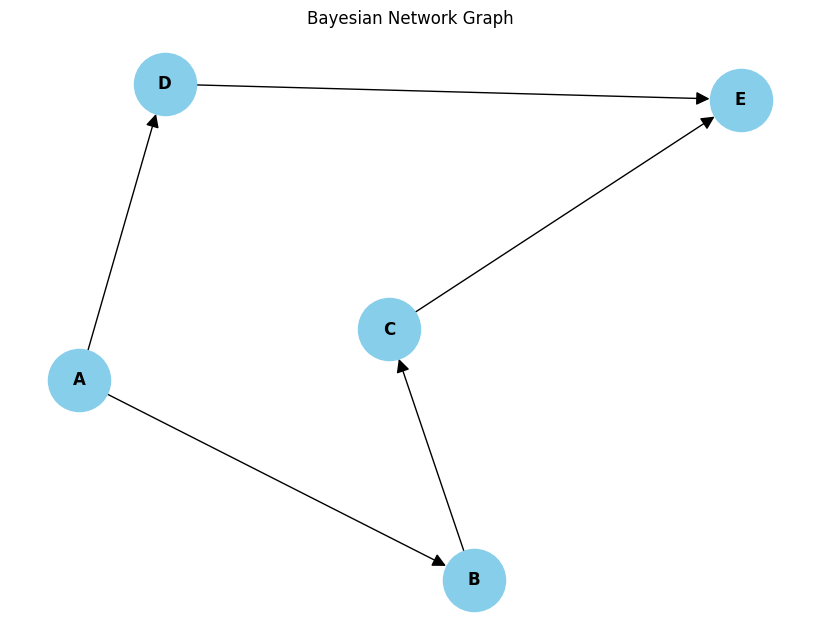

Is A d-separated from E given C? False
Is A d-separated from C given no observations? False


In [ ]:
# Create a Directed Acyclic Graph (DAG) representing a Bayesian Network
G = nx.DiGraph()
G.add_edges_from([
    ('A', 'B'),
    ('B', 'C'),
    ('A', 'D'),
    ('D', 'E'),
    ('C', 'E')
])

# Draw the DAG using a clean layout
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(
    G, pos,
    with_labels=True,
    node_size=2000,
    node_color="skyblue",
    font_size=12,
    font_weight="bold",
    arrowsize=20
)
plt.title("Bayesian Network Graph")
plt.show()

# Test d-separation (requires NetworkX 3.2+)
try:
    from networkx.algorithms.d_separation import is_d_separator

    result_1 = is_d_separator(G, {'A'}, {'E'}, {'C'})
    print(f"Is A d-separated from E given C? {result_1}")  # Expect True (blocked by collider C)

    result_2 = is_d_separator(G, {'A'}, {'C'}, set())
    print(f"Is A d-separated from C given no observations? {result_2}")  # Expect False (direct path exists)

except ImportError:
    print("Error: NetworkX >= 3.2 is required to use 'is_d_separator'. Please update your NetworkX version.")

## 10. Downloading Notebook as PDF

In [ ]:
!apt-get -qq install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

In [ ]:
!ls

sample_data


In [ ]:
import os

notebook_filename = "Probability_Concepts.ipynb"
if os.path.exists(notebook_filename):
    !jupyter nbconvert --to pdf {notebook_filename}
else:
    print(f"❌ File '{notebook_filename}' not found. Check the name and try again.")


❌ File 'Probability_Concepts.ipynb' not found. Check the name and try again.


In [ ]:
!jupyter nbconvert "Probability_Concepts.ipynb" --to pdf

[NbConvertApp] WARNING | pattern 'Probability_Concepts.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--ex

In [ ]:
# Download the notebook file from Colab, and re-upload it to files
!jupyter nbconvert Probability_Concepts.ipynb --to pdf
from google.colab import files
files.download('Probability_Concepts.pdf')

[NbConvertApp] WARNING | pattern 'Probability_Concepts.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--ex

FileNotFoundError: Cannot find file: Probability_Concepts.pdf